In [1]:
import sys
sys.path.append("../")

from smc.sampler import SMCsampler
from smc.prior import CatalogPrior
from smc.images import ImageAttributes

import torch
# torch.cuda.is_available()
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
torch.cuda.set_device(device)
torch.set_default_device(device)

import matplotlib.pyplot as plt

In [2]:
num_images = 1
img_dim = 64 # Needs to be square for now
img_width = img_dim
img_height = img_dim
max_objects = 80
psf_stdev = 1
background_intensity = 19200

prior = CatalogPrior(max_objects = max_objects,
                     img_height = img_height,
                     img_width = img_width,
                     min_flux = background_intensity/3.)

image_attributes = ImageAttributes(img_height = img_height,
                                   img_width = img_width,
                                   max_objects = max_objects,
                                   psf_stdev = psf_stdev,
                                   background_intensity = background_intensity)

true_counts, true_fluxes, true_locs, true_total_intensities, images = image_attributes.generate(prior, num_images)

image 1 
count
 71 
total flux
 4344749.0 
loc
 [[29.134138    6.1902113 ]
 [20.048752   60.927567  ]
 [49.145386   61.120106  ]
 [26.9102     42.074978  ]
 [39.41474    40.277016  ]
 [31.542501   46.641586  ]
 [22.153997    0.37859055]
 [28.19005    61.02487   ]
 [20.386904    6.2258177 ]
 [23.783976    1.5078269 ]
 [ 6.750576   25.746141  ]
 [19.812778   46.598503  ]
 [25.818344   41.03024   ]
 [16.936377   36.831806  ]
 [63.16357    50.156746  ]
 [21.396275   43.752808  ]
 [26.48348    38.365295  ]
 [41.07118    29.285505  ]
 [40.583237   57.36342   ]
 [40.746098   21.553337  ]
 [31.715376    1.3416563 ]
 [ 1.586863   60.620743  ]
 [26.237438   33.00476   ]
 [57.637306   61.550854  ]
 [52.528652   47.15773   ]
 [43.137802   11.250594  ]
 [52.484875   16.513407  ]
 [62.084625   16.67996   ]
 [ 8.671921   61.170925  ]
 [18.100855   45.556908  ]
 [50.69111    39.433094  ]
 [61.113884   38.243557  ]
 [53.28711    48.548912  ]
 [10.206049    3.1493297 ]
 [42.212006   51.99132   ]
 [ 0.45

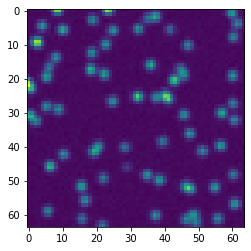

In [3]:
for i in range(num_images):
    print(f"image {i+1}",
          "\ncount\n", true_counts[i].round().item(),
          "\ntotal flux\n", true_fluxes[i].sum().item(),
          "\nloc\n", true_locs[i].cpu().numpy(), "\n\n")
    fig, img = plt.subplots(1,1)
    _ = img.imshow(images[i].cpu())

In [4]:
tile_side_length = 4
max_objects_smc = 2
pad = 2

prior = CatalogPrior(max_objects_smc,
                     img_width, img_height,
                     background_intensity/3.,
                     pad)

smc = SMCsampler(images[0], image_attributes, tile_side_length, prior,
                 max_objects = max_objects_smc,
                 catalogs_per_block = 250, product_form_multiplier = 500,
                 max_smc_iters = 500)

print(f"True count: {true_counts[0]}")
print(f"True total flux: {true_fluxes[0].sum()}\n")

smc.run(print_progress = True)
smc.summarize()

True count: 71
True total flux: 4344749.0

Starting the tile samplers...
iteration 5, temperature = 0.00020836068142671138
iteration 10, temperature = 0.0007379067246802151
iteration 15, temperature = 0.0025668025482445955
iteration 20, temperature = 0.01266723033040762
iteration 25, temperature = 0.040166258811950684
iteration 30, temperature = 0.12464465945959091
iteration 35, temperature = 0.42554426193237305
iteration 40, temperature = 0.9018675684928894
iteration 45, temperature = 0.9969333410263062
Done!

Combining the results...
Done!

Pruning detections...
Done!

summary
number of SMC iterations: 49
posterior mean count: 71.11285400390625
posterior mean total flux: 4215537.5



